In this project, we will see how we can add a watermark o an image. Adding a watermark works as a copywrite for your image, so that no one can illegally use your image or document. We will use OpenCV for this project to add logl and text as a watermark.

In [4]:
# Important library imports
import cv2
import numpy as np
import requests
from PIL import Image

We will start by importing required libraries like OpenCV for image processing, numpy for mathematical computation, etc.

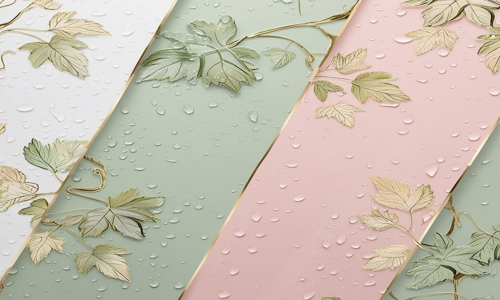

In [5]:
# Reading image from url
image = Image.open(requests.get('https://img.freepik.com/premium-photo/background-theme-with-pastel-tones-light-pink-sage-green-white-delicate-illustrations-gr_1228018-4557.jpg',stream=True).raw)
image_logow = image.resize((500,300))
image_textw = image.resize((500,300))
image_logow

For this project we need an image URL on which we will apply watermark. We will load the image using the URL of the image from google images. You can use any image taht you desire and replace the URL of the image with the current URL. Next we will read and resize the image and finally and store it into two variables for logo and text watermarking.

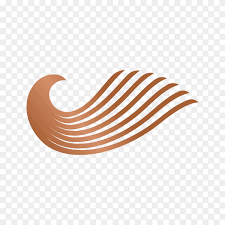

In [6]:
# Reading logo from URL
logo = Image.open(requests.get('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRjNxCgUzeHHs93mLEgwRCh2w0rn4SytMj86A&s',stream=True).raw)
logo

For logo we are using the above url .

In [7]:
image_logow = np.array(image_logow.convert('RGB'))
h_image, w_image, _ = image_logow.shape
logo = np.array(logo.convert('RGB'))
h_logo, w_logo, _ = logo.shape

In order to use these images we will first convert them to rgb format and store it as a numpy array. Similarly, we will also extractthe shape i.e. it's heightand width.

In [8]:
# Getthe center of the original. It's the location where we will place the watermark
center_y = int(h_image / 2)
center_x = int(w_image /2)
top_y = center_y - int(h_logo /2)
left_x = center_x - int(w_logo /2)
bottom_y = top_y + h_logo
right_x = left_x + w_logo

We willplace our watermark in the center of the image so far taht we need to calculate the center ofthe image. Here, we will find out the centercoordinates of the imageusing height and width of the image.

In [9]:
# Get ROI
roi = image_logow[top_y: bottom_y, left_x: right_x]
# Addthe logoto the ROI
result = cv2.addWeighted(roi, 1, logo, 1, 0)
# Drawing
cv2.line(image_logow, (0, center_y), (left_x, center_y), (0, 0, 255), 1)
cv2.line(image_logow, (right_x, center_y), (w_image, center_y), (0, 0, 255), 1)
# Replace tho ROI on the image
image_logow[top_y: bottom_y, left_x: right_x] = result

A Region Of Interest defined as the area we need to place our watermark on. Here, we will use OpenCV to merge our logo on ROI. Simiarly we will also add a line or a pattern on our image.

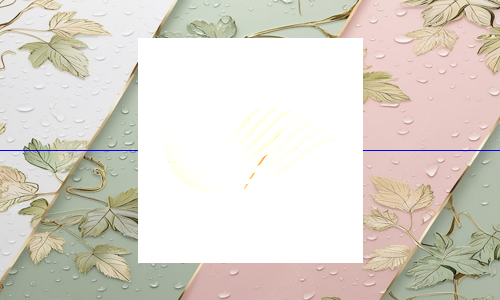

In [10]:
# Ploting logo watermarkimage
img = Image.fromarray(image_logow, 'RGB')
img

Now we will convertthe image from array to RGB and visualize it.

In [15]:
# Text watermarking
image_text = np.array(image_textw.convert('RGB'))
cv2.putText(image_text, text='Mahoor', org=(w_image - 95, h_image - 10), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.5,
            color=(56,14,25), thickness=2, lineType=cv2.LINE_4);

Next we shall see how we can use a text as a watermark. We will convert our image into RGB and save it as a numpy array. To put a text as a watermark we will be using putText() function of OpenCV. Here we can use different features like size of the text, thickness of the text, font family, etc.

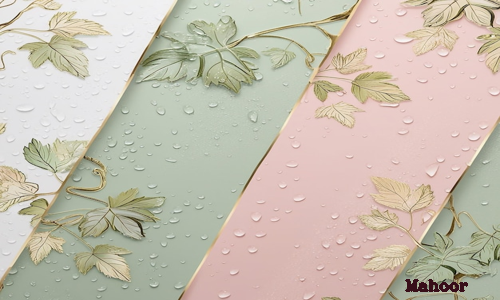

In [16]:
# Plotting text watermark image
timg =Image.fromarray(image_text , 'RGB')
timg

To visualizethe image we need to convert it back to RGB format.

#Conclusion:
__________________________________

Adding a watermark to an image works as a copyright. Different organizations can use it to make their content secure so that their content cannot be misused without their license or paid version. In this project we saw how easily we can use OpenCV to add watermarks to our images.